<a href="https://colab.research.google.com/github/queersweetpotato/atlantechAI/blob/main/visualisation/vis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/queersweetpotato/atlantechAI.git

Cloning into 'atlantechAI'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 13), reused 11 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 114.66 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
cd atlantechAI/visualisation/

/content/atlantechAI/visualisation


In [33]:
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from numpy import asarray, delete
from pandas import read_csv
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#read in data, separate into training (X) and target (y) data
df = read_csv("heartfaildata")
newdf = df[35:-1]
print(newdf)
data = newdf.values
#print(data)
X, y = data[35:-1, 1:], data[35:-1, 0:]

print(X)

#test prints to ensure the data is split properly
#print(X)
#print(y)

#define model as xgboost regressor (RF is random forest, without RF is linear)
#model = XGBRFRegressor(eval_metric='rmsle')
#model = XGBRegressor(eval_metric='rmsle')

#setting the tree method to exact causes errors when fitting, I am not sure why
model = XGBRFRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 30, tree_method="approx")


"""
#find the best hyper parameters

#set up our search grid
param_grid = {"max_depth":    [2, 3, 4],
              "n_estimators": [100, 150, 200, 250, 300],
              "learning_rate": [0.35, 0.4, 0.45, 0.5]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, refit=True, cv=5).fit(X, y)

print("The best hyperparameters are ",search.best_params_)

"""
"""
#evaluate the model

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
"""

#fit the model to the data
model.fit(X,y)

#test it, this row should result in 0 as the answer
data = [214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569]
data = asarray([data])
#print(model.predict(data))

                                                                  % Description:
55.0 0.0 748.0 0.0 45.0 0.0 263358.03 1.3 137.0 1.0 1.0 88.0  0.0            NaN
65.0 0.0 56.0  0.0 25.0 0.0 305000.0  5.0 130.0 1.0 0.0 207.0 0.0            NaN
45.0 0.0 582.0 1.0 38.0 0.0 319000.0  0.9 140.0 0.0 0.0 244.0 0.0            NaN
60.0 1.0 754.0 1.0 40.0 1.0 328000.0  1.2 126.0 1.0 0.0 90.0  0.0            NaN
95.0 1.0 582.0 0.0 30.0 0.0 461000.0  2.0 132.0 1.0 0.0 50.0  1.0            NaN
...                                                                          ...
65.0 1.0 160.0 1.0 20.0 0.0 327000.0  2.7 116.0 0.0 0.0 8.0   1.0            NaN
45.0 0.0 582.0 1.0 55.0 0.0 543000.0  1.0 132.0 0.0 0.0 250.0 0.0            NaN
60.0 1.0 582.0 0.0 30.0 1.0 127000.0  0.9 145.0 0.0 0.0 95.0  0.0            NaN
95.0 1.0 112.0 0.0 40.0 1.0 196000.0  1.0 138.0 0.0 0.0 24.0  1.0            NaN
65.0 1.0 160.0 1.0 20.0 0.0 327000.0  2.7 116.0 0.0 0.0 8.0   1.0            NaN

[4999 rows x 1 columns]
[]


XGBoostError: [11:33:49] /workspace/src/data/data.cc:514: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7f325ea5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e2229) [0x7f325ece2229]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e3a60) [0x7f325ece3a60]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb2) [0x7f325e963522]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7f32caa04e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7f32caa01493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7f32cac654d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x9c8e) [0x7f32cac64c8e]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x27c) [0x52f6dc]



### Testing the use of SHaP for ML data interpretation

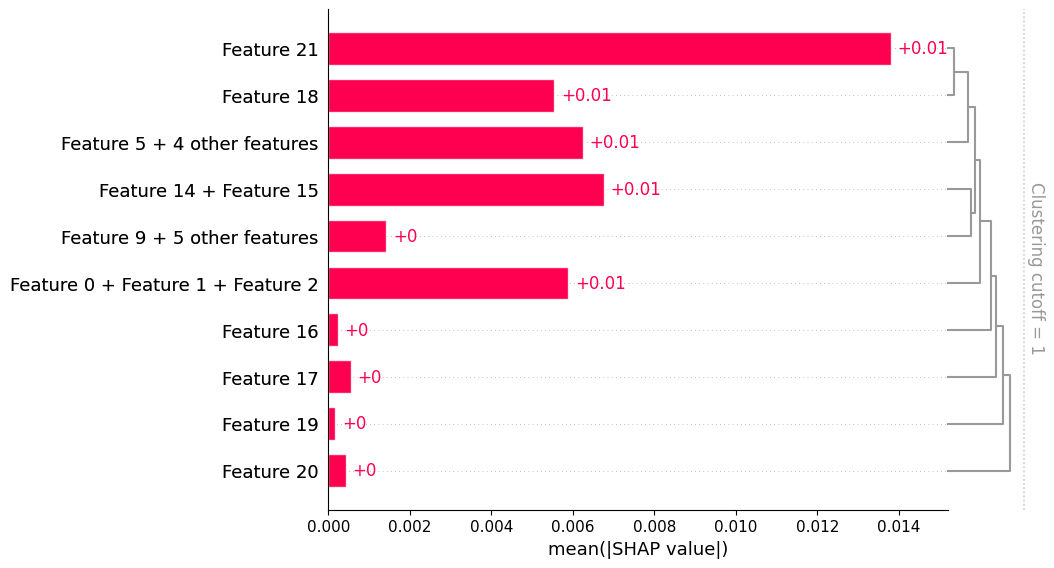

In [ ]:
import shap

#runs the explainer on the trained model
explainer = shap.Explainer(model)
shap_values = explainer(X)

#runs clustering
clust = shap.utils.hclust(X, y, linkage="single")

#plots the bar chart of the shap values
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

The data is not labelled correctly in the csv, it has no title to each datatype so it just gives them the names "Feature xxx"

In [65]:
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from numpy import asarray
from numpy import absolute
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#fetch dataset and split it into training and label data
data = fetch_openml(data_id=45949)

#the dataset does not have a defined target column, hence I have decided to use death event
y = data['data']['DEATH_EVENT']
#need to delete final column from the data bit
del data['data']['DEATH_EVENT']
X = data['data']
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

#define model
#model = XGBRFRegressor(eval_metric='rmsle')
model = XGBRFRegressor()
#model = XGBRFRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 30, tree_method="approx")

#train the model
model.fit(X_train, y_train)

#predict
preds = model.predict(X_test)
print(preds)
print(y_test)

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     55.0      0.0                     748.0       0.0               45.0   
1     65.0      0.0                      56.0       0.0               25.0   
2     45.0      0.0                     582.0       1.0               38.0   
3     60.0      1.0                     754.0       1.0               40.0   
4     95.0      1.0                     582.0       0.0               30.0   
...    ...      ...                       ...       ...                ...   
4995  45.0      0.0                     582.0       1.0               55.0   
4996  60.0      1.0                     582.0       0.0               30.0   
4997  95.0      1.0                     112.0       0.0               40.0   
4998  65.0      1.0                     160.0       1.0               20.0   
4999  40.0      0.0                     244.0       0.0               45.0   

      high_blood_pressure  platelets  serum_creatinine  serum_s

/usr/local/lib/python3.11/dist-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 3 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 10 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(


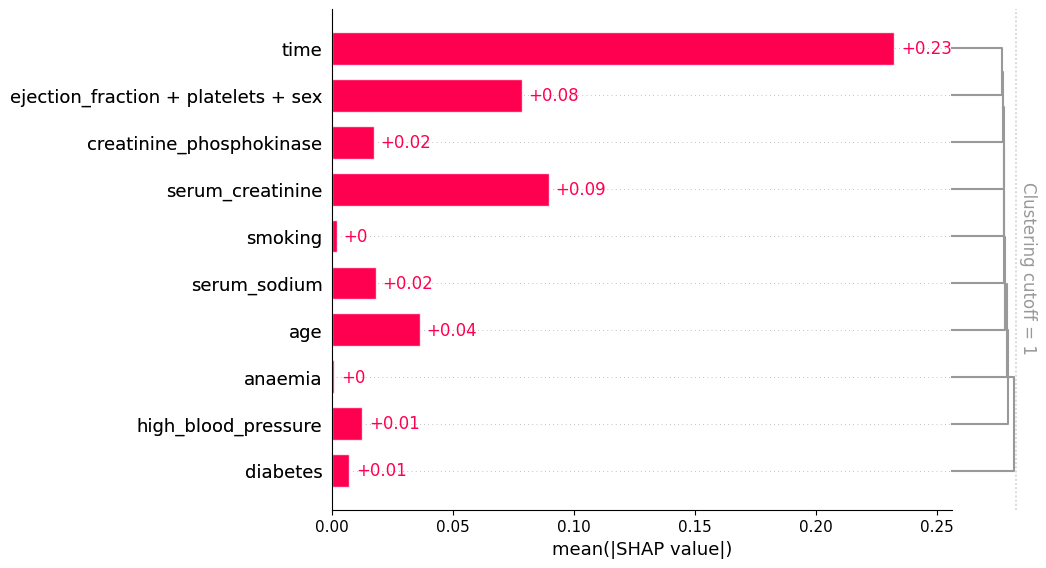

In [53]:
import shap

#runs the explainer on the trained model
explainer = shap.Explainer(model)
shap_values = explainer(X)

#runs clustering
clust = shap.utils.hclust(X, y, linkage="single")

#plots the bar chart of the shap values
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

.values =
array([[-3.1580701e-02, -1.2016360e-04, -1.0989962e-02, ...,
         8.0396538e-05,  5.0410005e-04, -1.3116221e-01],
       [-1.6694074e-02, -2.0120628e-03, -7.4511059e-02, ...,
        -1.8071920e-04, -1.9290487e-03, -2.0081709e-01],
       [-1.2565149e-02, -1.2432243e-04, -2.5328104e-03, ...,
         8.2000013e-04,  9.0209687e-07, -1.8887788e-01],
       ...,
       [ 1.7384937e-01, -2.6143154e-03,  3.6750282e-03, ...,
        -1.4180171e-03, -2.8955157e-05,  5.3097630e-01],
       [ 2.8635358e-02, -1.0859350e-03,  1.9141318e-02, ...,
         1.6883441e-04, -1.7413731e-03,  5.0905442e-01],
       [-1.8814877e-02, -6.9141111e-05, -1.9456439e-03, ...,
         1.9164955e-04, -2.8211245e-04, -1.8036683e-01]], dtype=float32)

.base_values =
array([0.3158536, 0.3158536, 0.3158536, ..., 0.3158536, 0.3158536,
       0.3158536], dtype=float32)

.data =
array([[ 55.,   0., 748., ...,   1.,   1.,  88.],
       [ 65.,   0.,  56., ...,   1.,   0., 207.],
       [ 45.,   0., 582., ..

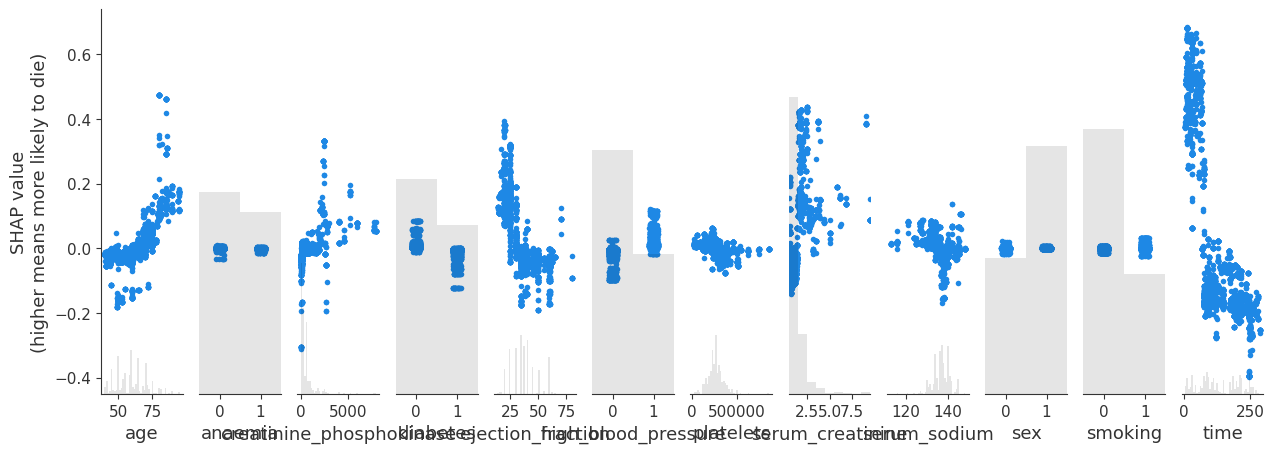

In [64]:
# next we make a scattter plot to see how changing parameters will affect the models predictions
shap.plots.scatter(shap_values, ylabel="SHAP value\n(higher means more likely to die)")

Here, if the plots are going up such as for age, increasing age increases the chance of death from heart failure.